In [74]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Save model
import joblib

%matplotlib inline


In [75]:
df = pd.read_csv("../Data/Typhoid.csv")
df.head()


,Patient ID,Age,Gender,Symptoms Severity,Hemoglobin (g/dL),Platelet Count,Blood Culture Bacteria,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mmol/L),Current Medication,Treatment Duration,Treatment Outcome
0,1,38,Female,Low,24.012919,259366,Escherichia coli,Klebsiella pneumoniae,8.7,9.079248,Amoxicillin,15 days,Unsuccessful
1,2,48,Male,Moderate,12.300000,208128,Salmonella typhi,-,8.3,4.300000,Ceftriaxone,5 days,Successful
2,3,33,Male,High,10.700000,251028,Escherichia coli,-,10.0,3.800000,Azithromycin,15 days,Unsuccessful
3,4,56,Male,High,14.900000,157787,Salmonella typhi,Klebsiella pneumoniae,9.4,3.700000,Ceftriaxone,13 days,Successful
4,5,67,Male,NaN,13.100000,217075,Salmonella typhi,Escherichia coli,9.8,5.000000,Amoxicillin,13 days,NaN


In [76]:
df.shape


(5760, 13)

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient ID              5760 non-null   int64  
 1   Age                     5760 non-null   int64  
 2   Gender                  5760 non-null   object 
 3   Symptoms Severity       5131 non-null   object 
 4   Hemoglobin (g/dL)       5760 non-null   float64
 5   Platelet Count          5760 non-null   int64  
 6   Blood Culture Bacteria  4928 non-null   object 
 7   Urine Culture Bacteria  5760 non-null   object 
 8   Calcium (mg/dL)         5760 non-null   float64
 9   Potassium (mmol/L)      5760 non-null   float64
 10  Current Medication      5760 non-null   object 
 11  Treatment Duration      5029 non-null   object 
 12  Treatment Outcome       5184 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 585.1+ KB


In [78]:
df.describe(include="all")


,Patient ID,Age,Gender,Symptoms Severity,Hemoglobin (g/dL),Platelet Count,Blood Culture Bacteria,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mmol/L),Current Medication,Treatment Duration,Treatment Outcome
count,5760.000000,5760.000000,5760,5131,5760.000000,5760.000000,4928,5760,5760.000000,5760.000000,5760,5029,5184
unique,NaN,NaN,2,3,NaN,NaN,3,3,NaN,NaN,3,11,2
top,NaN,NaN,Male,Low,NaN,NaN,Staphylococcus,Escherichia coli,NaN,NaN,Amoxicillin,8 days,Successful
freq,NaN,NaN,2974,1908,NaN,NaN,1697,2072,NaN,NaN,2053,577,2810
mean,2880.500000,43.092361,NaN,NaN,12.993261,209146.474653,NaN,NaN,9.054488,4.567818,NaN,NaN,NaN
std,1662.913107,14.910935,NaN,NaN,2.640090,50014.224866,NaN,NaN,2.439132,1.382174,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,10.000000,120255.000000,NaN,NaN,0.021594,3.500000,NaN,NaN,NaN
25%,1440.750000,31.000000,NaN,NaN,11.300000,168405.000000,NaN,NaN,8.500000,3.900000,NaN,NaN,NaN
50%,2880.500000,42.000000,NaN,NaN,12.600000,211847.000000,NaN,NaN,9.000000,4.300000,NaN,NaN,NaN
75%,4320.250000,55.000000,NaN,NaN,13.900000,251028.000000,NaN,NaN,9.500000,4.700000,NaN,NaN,NaN


In [79]:
target_column = "Treatment Outcome"


In [80]:
cat_cols = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [81]:
df.drop("Patient ID", axis=1, inplace=True)

In [82]:
df.head()

,Age,Gender,Symptoms Severity,Hemoglobin (g/dL),Platelet Count,Blood Culture Bacteria,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mmol/L),Current Medication,Treatment Duration,Treatment Outcome
0,38,0,1,24.012919,259366,0,2,8.7,9.079248,0,5,1
1,48,1,2,12.300000,208128,1,0,8.3,4.300000,2,6,0
2,33,1,0,10.700000,251028,0,0,10.0,3.800000,1,5,1
3,56,1,0,14.900000,157787,1,2,9.4,3.700000,2,3,0
4,67,1,3,13.100000,217075,1,1,9.8,5.000000,0,3,2


In [83]:
df.isnull().sum()
df.fillna(df.median(), inplace=True)

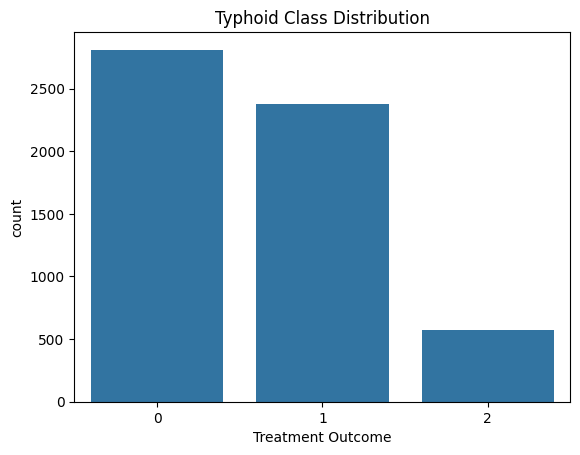

In [84]:
sns.countplot(x=target_column, data=df)
plt.title("Typhoid Class Distribution")
plt.show()


In [85]:
selected_features = [
    'Platelet Count',
    'Age',
    'Hemoglobin (g/dL)',
    'Calcium (mg/dL)',
    'Potassium (mmol/L)',
    'Treatment Duration',
    'Blood Culture Bacteria',
    'Symptoms Severity',
    'Urine Culture Bacteria',
    'Current Medication',
    'Gender'
]
X = df[selected_features]
y = df[target_column]

In [86]:
rf_selector = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf_selector.fit(X, y)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [87]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_selector.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
0,Platelet Count,0.174241
1,Age,0.147493
2,Hemoglobin (g/dL),0.137788
3,Calcium (mg/dL),0.119049
4,Potassium (mmol/L),0.114846
5,Treatment Duration,0.090240
6,Blood Culture Bacteria,0.055895
7,Symptoms Severity,0.050550
8,Urine Culture Bacteria,0.042581
9,Current Medication,0.041868


In [88]:
important_features = importance_df[
    importance_df["Importance"] >= 0.01
]["Feature"].tolist()

important_features


['Platelet Count',
 'Age',
 'Hemoglobin (g/dL)',
 'Calcium (mg/dL)',
 'Potassium (mmol/L)',
 'Treatment Duration',
 'Blood Culture Bacteria',
 'Symptoms Severity',
 'Urine Culture Bacteria',
 'Current Medication',
 'Gender']

In [89]:
df_reduced = df[important_features + [target_column]]
df_reduced.head()


,Platelet Count,Age,Hemoglobin (g/dL),Calcium (mg/dL),Potassium (mmol/L),Treatment Duration,Blood Culture Bacteria,Symptoms Severity,Urine Culture Bacteria,Current Medication,Gender,Treatment Outcome
0,259366,38,24.012919,8.7,9.079248,5,0,1,2,0,0,1
1,208128,48,12.300000,8.3,4.300000,6,1,2,0,2,1,0
2,251028,33,10.700000,10.0,3.800000,5,0,0,0,1,1,1
3,157787,56,14.900000,9.4,3.700000,3,1,0,2,2,1,0
4,217075,67,13.100000,9.8,5.000000,3,1,3,1,0,1,2


In [90]:
X_final = df_reduced.drop(columns=target_column)
y_final = df_reduced[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)


In [91]:
final_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    random_state=42
)

final_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [92]:
y_pred = final_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall   :", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred,average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.8741319444444444
Precision: 0.7871910942925348
Recall   : 0.8741319444444444
F1 Score : 0.8282317386376002

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       562
           1       0.89      0.96      0.92       475
           2       0.00      0.00      0.00       115

    accuracy                           0.87      1152
   macro avg       0.58      0.65      0.61      1152
weighted avg       0.79      0.87      0.83      1152



d:\Health Check-Up System\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Health Check-Up System\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Health Check-Up System\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Health 

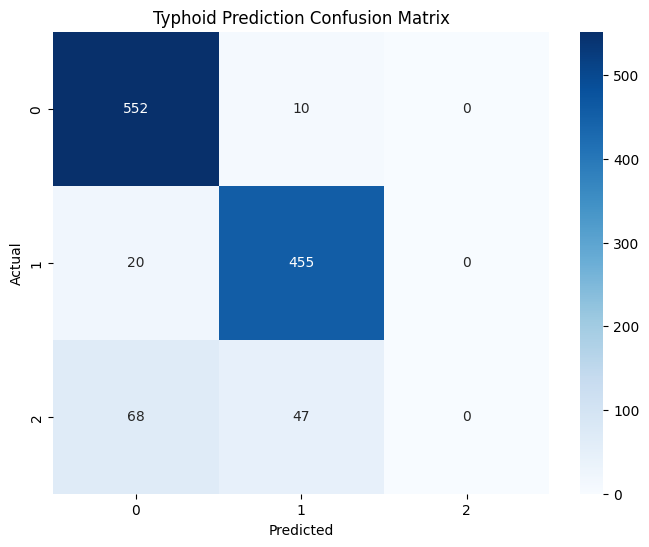

In [93]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Typhoid Prediction Confusion Matrix")
plt.show()


In [94]:
df.head()

,Age,Gender,Symptoms Severity,Hemoglobin (g/dL),Platelet Count,Blood Culture Bacteria,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mmol/L),Current Medication,Treatment Duration,Treatment Outcome
0,38,0,1,24.012919,259366,0,2,8.7,9.079248,0,5,1
1,48,1,2,12.300000,208128,1,0,8.3,4.300000,2,6,0
2,33,1,0,10.700000,251028,0,0,10.0,3.800000,1,5,1
3,56,1,0,14.900000,157787,1,2,9.4,3.700000,2,3,0
4,67,1,3,13.100000,217075,1,1,9.8,5.000000,0,3,2


In [95]:
new_patient_raw = {
    'Platelet Count': 2500000,
    'Age': 67,
    'Hemoglobin (g/dL)': 13.100000,
    'Calcium (mg/dL)': 10.8,
    'Potassium (mmol/L)': 50.000000,
    'Treatment Duration': 3,
    'Blood Culture Bacteria': 1,     # 1 = Positive, 0 = Negative
    'Symptoms Severity': 3,          # 1=Low, 2=Medium, 3=High
    'Urine Culture Bacteria': 1,     # 1 = Positive, 0 = Negative
    'Current Medication': 0,         # Encoded value
    'Gender': 1                      # 1 = Male, 0 = Female
}
new_patient = pd.DataFrame([new_patient_raw])

# Force correct column order
new_patient = new_patient.reindex(columns=selected_features)

new_patient
prediction = final_model.predict(new_patient)[0]
if prediction == 1:
    print("⚠️ Typhoid Detected")
else:
    print("✅ No Typhoid Detected")


✅ No Typhoid Detected


In [96]:
joblib.dump(final_model, "../models/typhoid_model.pkl")
joblib.dump(important_features, "../models/typhoid_important_features.pkl")


['../models/typhoid_important_features.pkl']